In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
climateTest = pd.read_csv( "DailyDelhiClimateTest.csv" )


In [ ]:
climateTest.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
climateTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [ ]:
import seaborn as sns

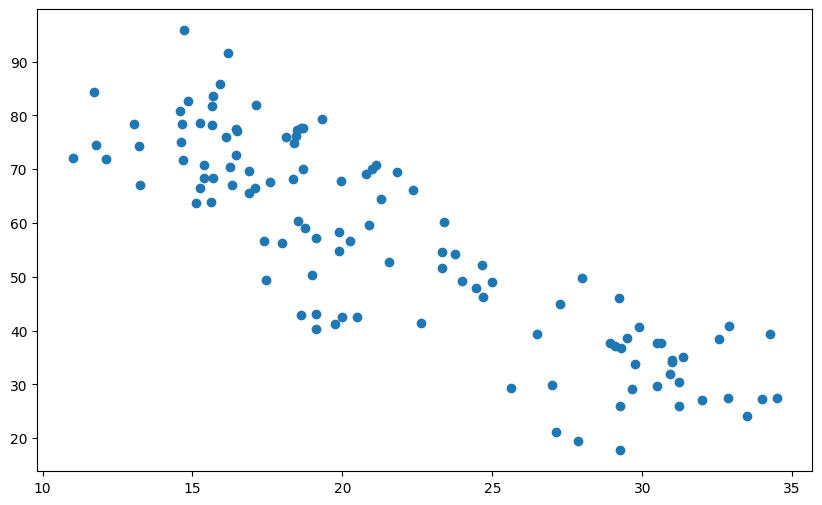

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(climateTest['meantemp'],climateTest['humidity'])
plt.show()

In [ ]:
X = climateTest['meantemp']
y = climateTest['humidity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [ ]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(79,)
(35,)
(79,)
(35,)


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)

In [ ]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

,0
const,110.460555
meantemp,-2.488621


In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     203.7
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.48e-23
Time:                        17:09:09   Log-Likelihood:                -292.07
No. Observations:                  79   AIC:                             588.1
Df Residuals:                      77   BIC:                             592.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.4606      3.947     27.984      0.0

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

,0
95,32.760285
97,46.689649
108,27.091760
26,69.398313
104,32.760285


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))

print( "R-squared: ",r2_score( y_test, y_pred ) )

RMSE:  9.813898044378695
R-squared:  0.753094526972651


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df = df[df['target'] != 2]  # Remove class 2

In [ ]:
features = df.drop('target', axis=1)
target = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy*100)

accuracy :  100.0


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[12  0]
 [ 0  8]]


In [ ]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

